In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Support Functions
---

*Plot Functions*
- plot_all_sensors
- gravity_plot
- acceleration_plot
- linear_acceleration_plot
- gyroscope_plot

In [2]:
def gravity_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['gravity_time'], dataframe['gravity_x'], label='X (m/s^2)')
    plt.plot(dataframe['gravity_time'], dataframe['gravity_y'], label='Y (m/s^2)')
    plt.plot(dataframe['gravity_time'], dataframe['gravity_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Gravity (m/s^2)')
    plt.title('Gravity Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def acceleration_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['acc_time'], dataframe['acc_x'], label='X (m/s^2)')
    plt.plot(dataframe['acc_time'], dataframe['acc_y'], label='Y (m/s^2)')
    plt.plot(dataframe['acc_time'], dataframe['acc_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.title('Acceleration Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def linear_acceleration_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_x'], label='X (m/s^2)')
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_y'], label='Y (m/s^2)')
    plt.plot(dataframe['lin_acc_time'], dataframe['lin_acc_z'], label='Z (m/s^2)')
    plt.xlabel('Time (s)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    plt.title('Linear Acceleration Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def gyroscope_plot(dataframe):
    plt.figure(figsize=(12, 8))
    plt.plot(dataframe['gyro_time'], dataframe['gyro_x'], label='X (rad/s)')
    plt.plot(dataframe['gyro_time'], dataframe['gyro_y'], label='Y (rad/s)')
    plt.plot(dataframe['gyro_time'], dataframe['gyro_z'], label='Z (rad/s)')
    plt.xlabel('Time (s)')
    plt.ylabel('Gyroscope (rad/s)')
    plt.title('Gyroscope Data Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_all_sensors(dataframe):
    gravity_plot(dataframe)
    acceleration_plot(dataframe)
    linear_acceleration_plot(dataframe)
    gyroscope_plot(dataframe)

*Data Cleaning*
- clean_data_statistics

In [3]:
def clean_statistics(df):
    stats = df.describe().drop(columns=['gravity_time', 'acc_time', 'lin_acc_time', 'gyro_time'])
    stats.index = [re.sub(r'^(.*)$', r'\1', idx) for idx in stats.index]
    return stats

# Experiment on Y-axis movement

In [4]:
positive_y_axis_data = pd.read_csv(r'data\base\y_axis\1\sensor_data_20251002_140826_linha_reta_x_mais.csv')
negative_y_axis_data = pd.read_csv(r'data\base\y_axis\1\sensor_data_20251002_140920_linha_reta_x_menos.csv')
positive_and_negative_y_axis_data = pd.read_csv(r'data\base\y_axis\2\sensor_data_20251002_141355.csv')

In [5]:
positive_y_axis_data['time_only'] = pd.to_datetime(positive_y_axis_data['timestamp']).dt.time
negative_y_axis_data['time_only'] = pd.to_datetime(negative_y_axis_data['timestamp']).dt.time
positive_and_negative_y_axis_data['time_only'] = pd.to_datetime(positive_and_negative_y_axis_data['timestamp']).dt.time

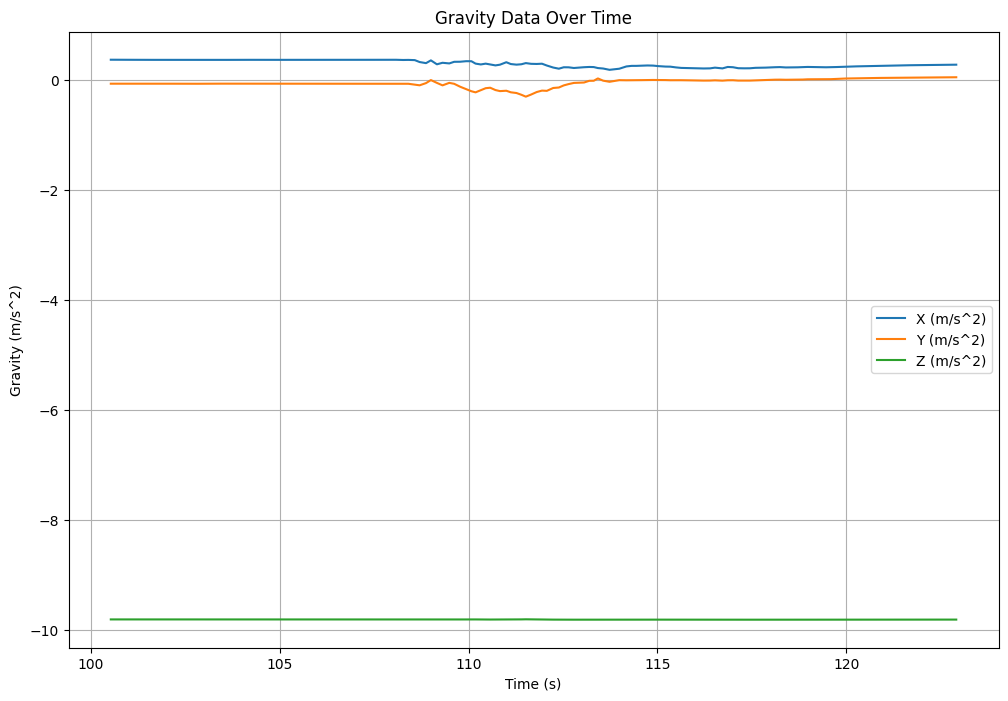

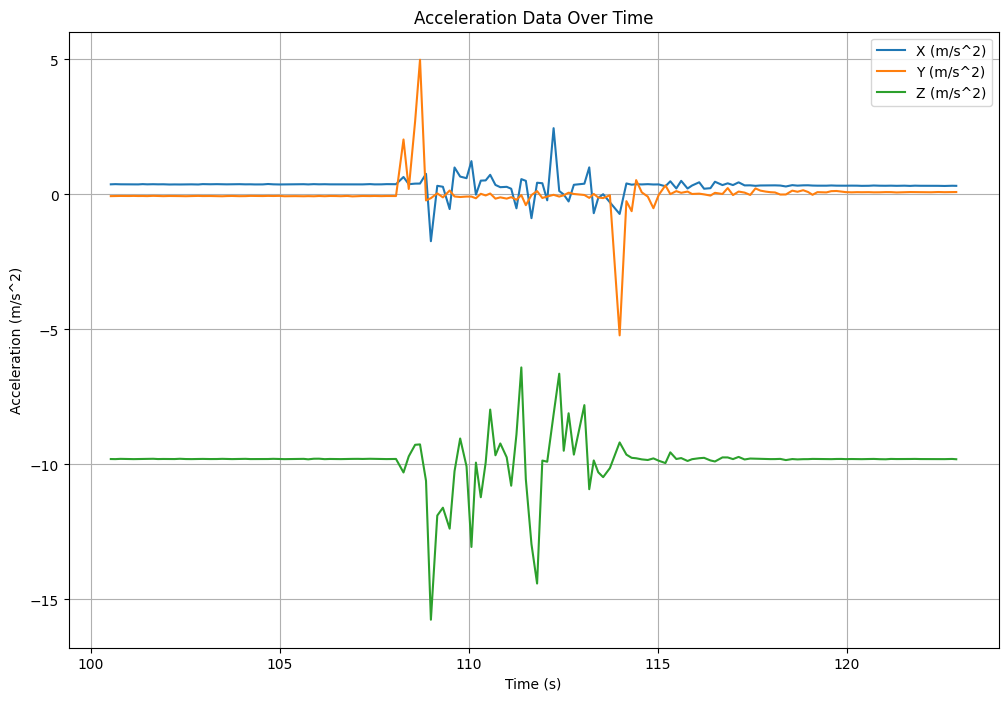

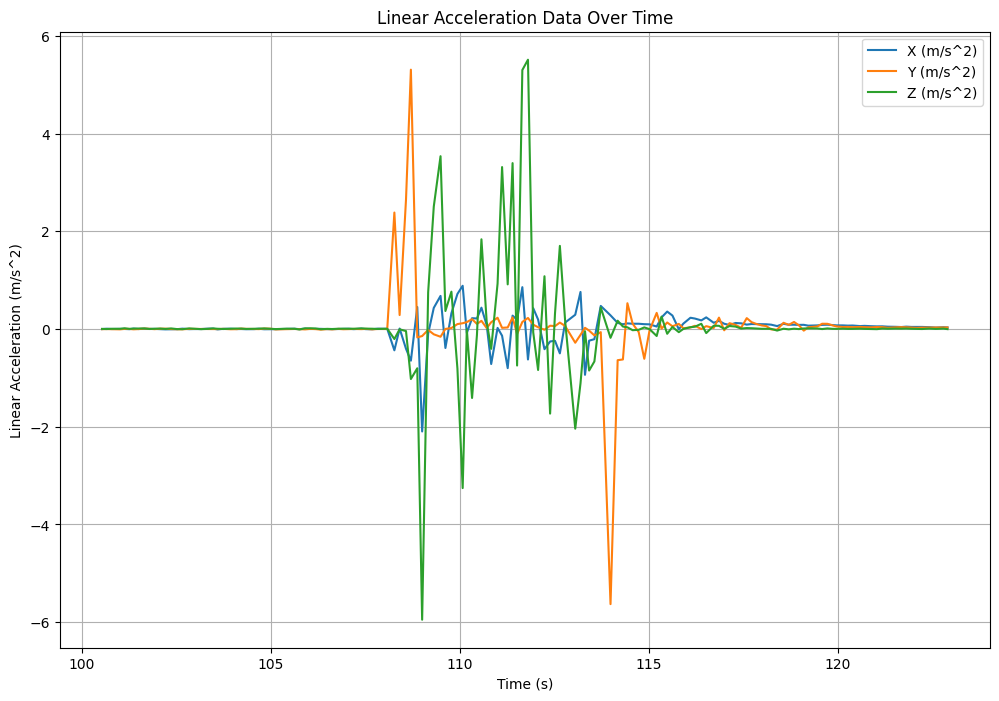

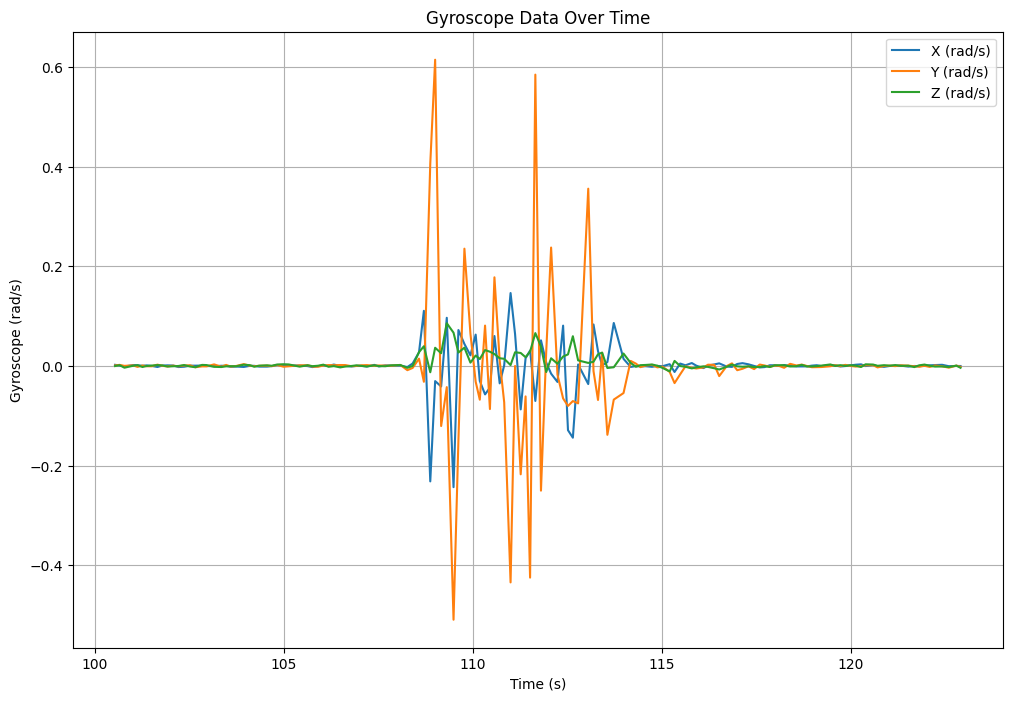

In [6]:
plot_all_sensors(negative_y_axis_data)

## Calculating Velocity from Linear Acceleration

In [8]:
y_lin_acc = positive_y_axis_data[['lin_acc_y', 'lin_acc_time']]

### Zeroing the time

In [10]:
y_lin_acc['lin_acc_time'] = y_lin_acc['lin_acc_time'] - 41.11352079163771

C:\Users\gupes\AppData\Local\Temp\ipykernel_13160\4010210245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_lin_acc['lin_acc_time'] = y_lin_acc['lin_acc_time'] - 41.11352079163771


### Adding offset to lin_acc_y
*When static the lin_acc shows y = -0.007545091118881794, so we need to add this value to the y_lin_acc to zero it.*

In [22]:
y_lin_acc['lin_acc_y'] = y_lin_acc['lin_acc_y'] + 0.007545091118881794

C:\Users\gupes\AppData\Local\Temp\ipykernel_13160\2841830387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_lin_acc['lin_acc_y'] = y_lin_acc['lin_acc_y'] + 0.007545091118881794


In [23]:
y_lin_acc

,lin_acc_y,lin_acc_time
0,0.011855,0.000000
1,0.005434,0.148968
2,-0.007669,0.278074
3,0.002527,0.476698
4,0.016264,0.605803
...,...,...
164,0.353330,25.761573
165,0.352223,25.970129
166,0.173709,26.466691
167,0.879935,26.645453


In [24]:
def velocity_from_acceleration(acceleration_data, time_column, acceleration_column):
    velocity = np.zeros(len(acceleration_data))
    for i in range(1, len(acceleration_data)):
        dt = acceleration_data[time_column].iloc[i] - acceleration_data[time_column].iloc[i - 1]
        velocity[i] = velocity[i - 1] + acceleration_data[acceleration_column].iloc[i] * dt
    return velocity

y_lin_vel = velocity_from_acceleration(y_lin_acc, 'lin_acc_time', 'lin_acc_y')

In [25]:
y_lin_vel

array([ 0.00000000e+00,  8.09437610e-04, -1.80647808e-04,  3.21275339e-04,
        2.42105469e-03,  8.64790967e-03,  1.77050233e-02,  1.07215480e-02,
        1.44816077e-02,  1.47883428e-02,  1.63293229e-02,  1.79516497e-02,
        1.88324557e-02,  2.10051498e-02,  2.55807861e-02,  2.74361474e-02,
        3.05999312e-02,  3.21933386e-02,  3.43984331e-02,  3.75875232e-02,
        3.97561784e-02,  4.29283846e-02,  4.48770202e-02,  4.49997737e-02,
        4.69455193e-02,  4.77141881e-02,  4.92758902e-02,  5.16871537e-02,
        5.34056428e-02,  5.47287670e-02,  5.48594647e-02,  5.39376134e-02,
        5.46188308e-02,  5.69082999e-02,  5.81779915e-02,  6.00942304e-02,
        6.13752217e-02,  6.34812261e-02,  6.59734921e-02,  6.85264902e-02,
        6.95076286e-02,  6.91157250e-02,  6.61180212e-02,  6.75960320e-02,
        6.78031633e-02,  6.87709951e-02,  7.03752204e-02,  7.10325859e-02,
        7.01309748e-02,  7.01881035e-02,  7.16286412e-02,  7.04949967e-02,
        7.03725926e-02,  

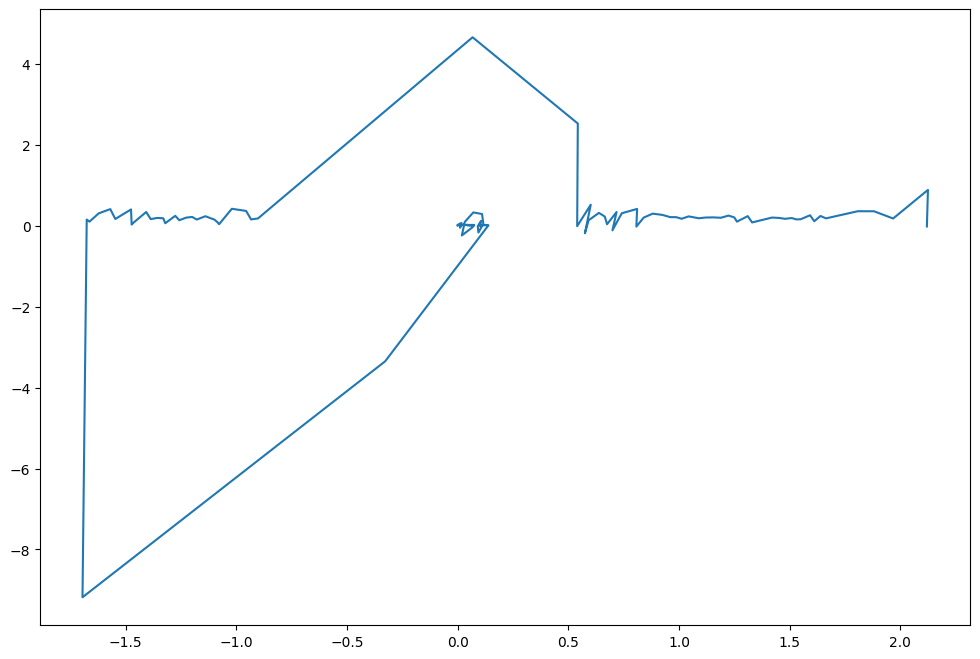

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(y_lin_vel, y_lin_acc['lin_acc_y'])
y_axis_measures = pd.DataFrame(y_lin_vel)

In [38]:
y_axis_measures = pd.concat([y_lin_acc, pd.DataFrame(y_lin_vel, columns=['velocity'])], axis=1)

In [39]:
y_axis_measures

,lin_acc_y,lin_acc_time,velocity
0,0.011855,0.000000,0.000000
1,0.005434,0.148968,0.000809
2,-0.007669,0.278074,-0.000181
3,0.002527,0.476698,0.000321
4,0.016264,0.605803,0.002421
...,...,...,...
164,0.353330,25.761573,1.807862
165,0.352223,25.970129,1.881321
166,0.173709,26.466691,1.967578
167,0.879935,26.645453,2.124877
